In [1]:
import pandas as pd
import numpy as np

In [2]:
price_df = pd.read_csv('..\\Data\\ETF_price_data.csv')

In [3]:
price_df.set_index('Dates', inplace=True)

In [4]:
ret_df = price_df/price_df.shift(1)-1
ret_df.dropna(inplace=True)
ret_df = ret_df.iloc[:, -6:]

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=4)

In [7]:
pca.fit(ret_df)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca.explained_variance_ratio_

array([0.80381619, 0.12889358, 0.04735778, 0.0156789 ])

In [9]:
new_X = pca.fit_transform(ret_df)[:,0]

In [10]:
ret_df.columns

Index(['TIP US Equity', 'AGG US Equity', 'IEF US Equity', 'TLT US Equity',
       'SHY US Equity', 'LQD US Equity'],
      dtype='object')

In [11]:
np.cov(new_X.reshape(-1), ret_df.iloc[:,3])

array([[0.0020122 , 0.00161757],
       [0.00161757, 0.00137461]])

In [12]:
import matplotlib.pyplot as plt

In [13]:
plt.figure(figsize=(20,10))
plt.plot(ret_df.index, new_X[:,0])
plt.xticks(rotation='vertical')
plt.show()

IndexError: too many indices for array

<Figure size 1440x720 with 0 Axes>

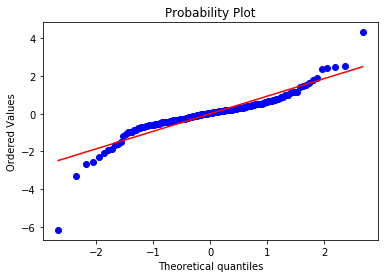

In [16]:
ncomp = 1
pca_w = pca.components_[ncomp,:]/pca.components_[ncomp,:].sum()
pd.Series(data = pca_w, index=ret_df.columns).sort_values()
pca_ret = (ret_df * pca_w).sum(axis=1)
pca_ret = (pca_ret-pca_ret.mean())/pca_ret.std()

import scipy.stats as stats
import pylab 
stats.probplot(pca_ret, dist="norm", plot=pylab)
pylab.show()
